In [15]:
#Analyzing Netflix Data using Pandas and Matplotlib

In [2]:
from google.colab import files
uploaded = files.upload()


Saving netflix_titles.csv to netflix_titles.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To show plots inside the notebook
%matplotlib inline

# Optional: better plot style
sns.set(style="darkgrid")


In [4]:
# Load CSV file
df = pd.read_csv("netflix_titles.csv")

# Display first 5 rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
# Check info about data
df.info()

# Check for null values
df.isnull().sum()

# Remove leading/trailing whitespaces in 'date_added'
df['date_added'] = df['date_added'].str.strip()

# Now convert to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


# Extract year and month
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df[['date_added', 'year_added', 'month_added']].head()


,date_added,year_added,month_added
0,2021-09-25,2021.0,9.0
1,2021-09-24,2021.0,9.0
2,2021-09-24,2021.0,9.0
3,2021-09-24,2021.0,9.0
4,2021-09-24,2021.0,9.0


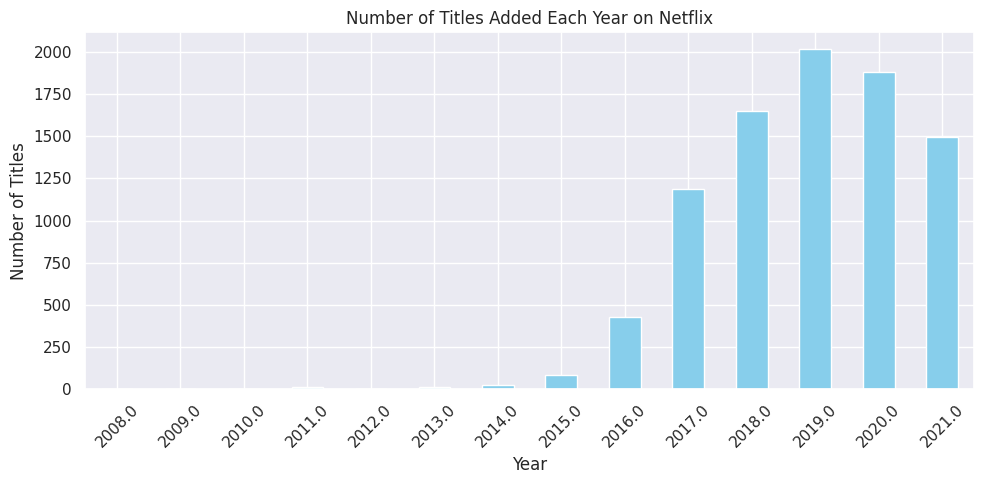

In [8]:
yearly_additions = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(10,5))
yearly_additions.plot(kind='bar', color='skyblue')
plt.title("Number of Titles Added Each Year on Netflix")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


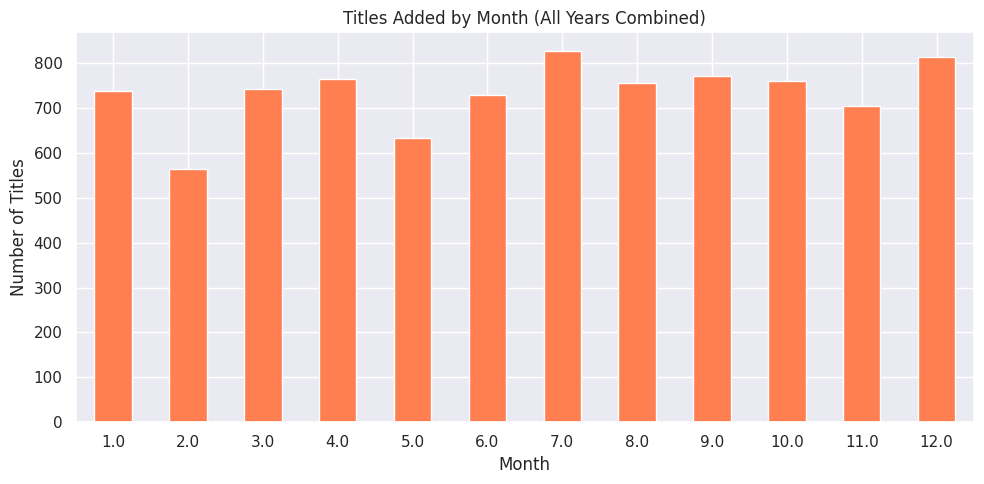

In [9]:
monthly_additions = df['month_added'].value_counts().sort_index()

plt.figure(figsize=(10,5))
monthly_additions.plot(kind='bar', color='coral')
plt.title("Titles Added by Month (All Years Combined)")
plt.xlabel("Month")
plt.ylabel("Number of Titles")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


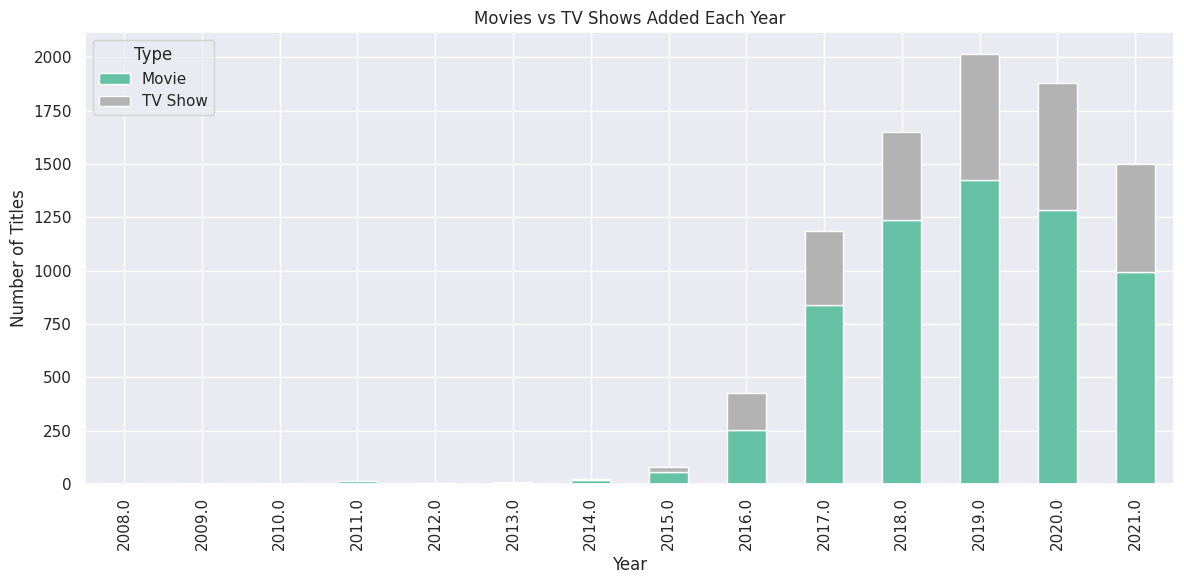

In [10]:
df.groupby(['year_added', 'type']).size().unstack().plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
plt.title("Movies vs TV Shows Added Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.legend(title='Type')
plt.tight_layout()
plt.show()


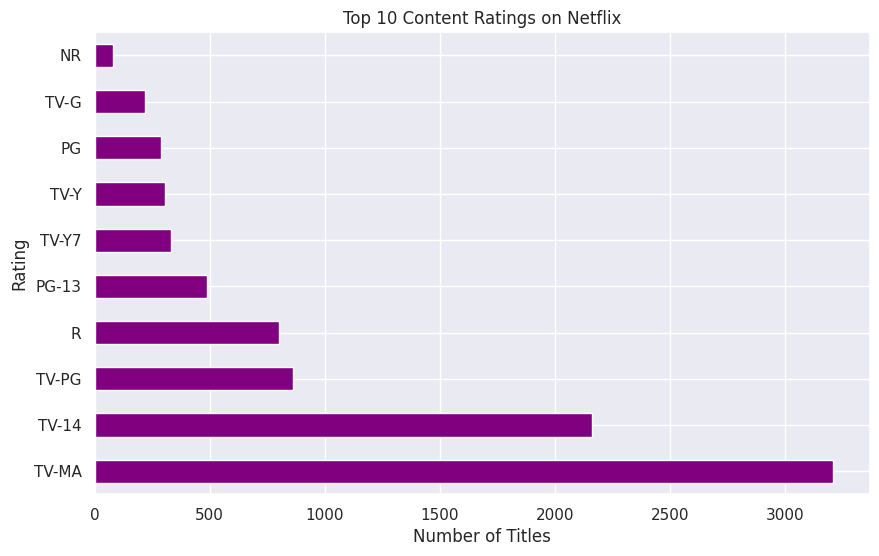

In [11]:
plt.figure(figsize=(10,6))
df['rating'].value_counts().head(10).plot(kind='barh', color='purple')
plt.title("Top 10 Content Ratings on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Rating")
plt.show()


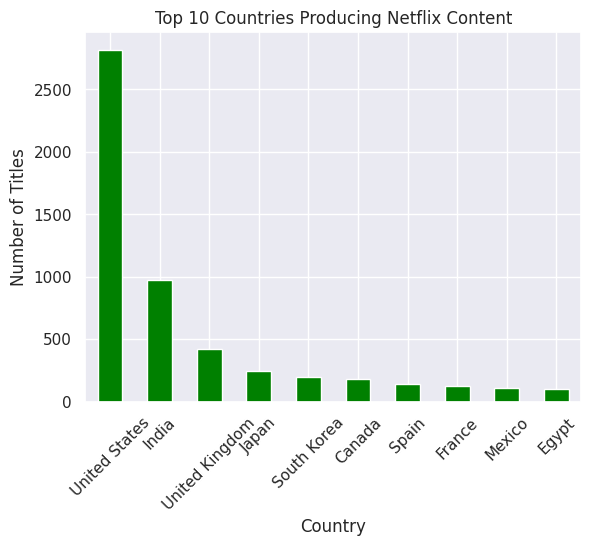

In [12]:
df['country'].value_counts().head(10).plot(kind='bar', color='green')
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()


<ipython-input-13-7e66dc689989>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_df.head(10), x='Genre', y='Count', palette='muted')


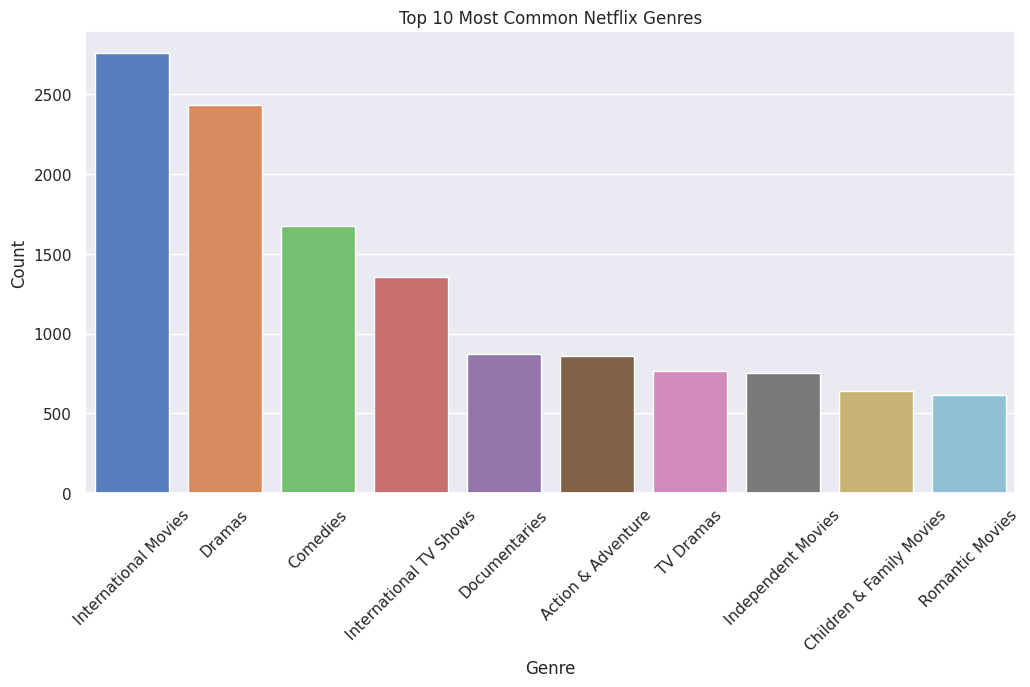

In [13]:
from collections import Counter

# Combine all genres into one big list
all_genres = ','.join(df['listed_in'].dropna()).split(',')

# Count each genre
genre_counts = Counter([genre.strip() for genre in all_genres])

# Convert to DataFrame for plotting
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=genre_df.head(10), x='Genre', y='Count', palette='muted')
plt.title("Top 10 Most Common Netflix Genres")
plt.xticks(rotation=45)
plt.show()


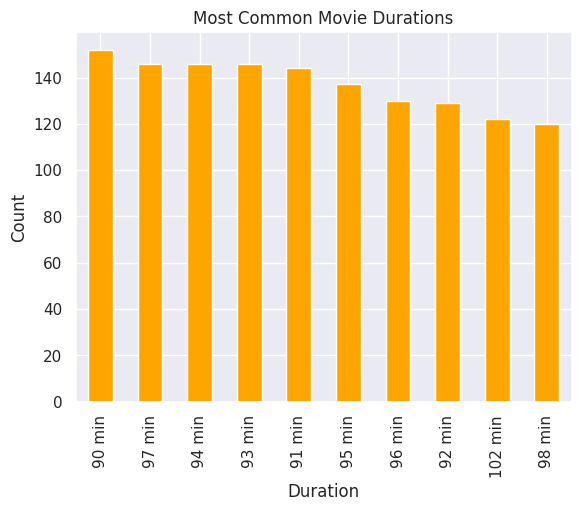

In [14]:
# Separate Movies and TV Shows
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

# Most common durations
movies['duration'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Most Common Movie Durations")
plt.xlabel("Duration")
plt.ylabel("Count")
plt.show()
